# Frequency mixer: ‘Beauty and the Blur’

In this notebook, we will be performing the following things:
- Computing FFT
- Plotting Magnitude Spectras
- Rotate the image 90 degrees and plotting its magnitude spectras
- Comparing the Magnitude Spectras
- Creating Hybrid Image

## 2D Discrete Fourier Transform (2D-DFT)

The 2D Discrete Fourier Transform (2D-DFT) is a tool used in image processing to convert the image from spatial domain to frequency domain. It enables task like image filtering, enhancement, etc.

### Forward 2D-DFT

Given a 2D discrete signal \( f(m, n) \) of size \( M X N \), the 2D-DFT is defined as:

$$
F(u, v) = \sum_{m=0}^{M-1} \sum_{n=0}^{N-1} f(m, n) \cdot e^{-j 2\pi \left( \frac{um}{M} + \frac{vn}{N} \right)}
$$

- \( f(m, n) \): Spatial domain input signal (image)  
- \( F(u, v) \): Frequency domain representation  
- \( M, N \): Dimensions of the image  
- \( u, v \): Frequency indices  
- \( j \): Imaginary unit  


### Inverse 2D-DFT

After making changes (like filtering), we can transform image from frequency domain back to spatial domain

$$
f(m, n) = \frac{1}{MN} \sum_{u=0}^{M-1} \sum_{v=0}^{N-1} F(u, v) \cdot e^{j 2\pi \left( \frac{um}{M} + \frac{vn}{N} \right)}
$$

### Applications in Image Processing

- Image filtering
- Compression
- Frequency analysis
- Feature extraction


In [1]:
#importing required libraries of program
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

We will load the image using `matplotlib.image.imread`.

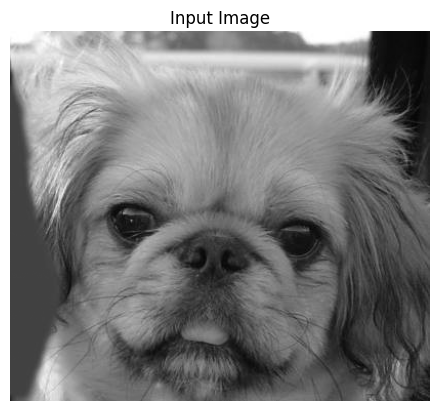

In [2]:
img_dog = mpimg.imread('dog_gray.jpg')

plt.imshow(img_dog, cmap='gray')
plt.axis('off')  
plt.title('Input Image')
plt.show()

Finding fourier transform of the image

In [3]:
f_transform_dog = np.fft.fft2(img_dog)

Magnitude Spectrum: Normal and dB form

In [4]:
mag_normal = np.abs(f_transform_dog)
mag_dB = 20 * np.log10(mag_normal + 1e-5) # Added 1e-5 to avoid log(0)

Displaying both magnitude spectras

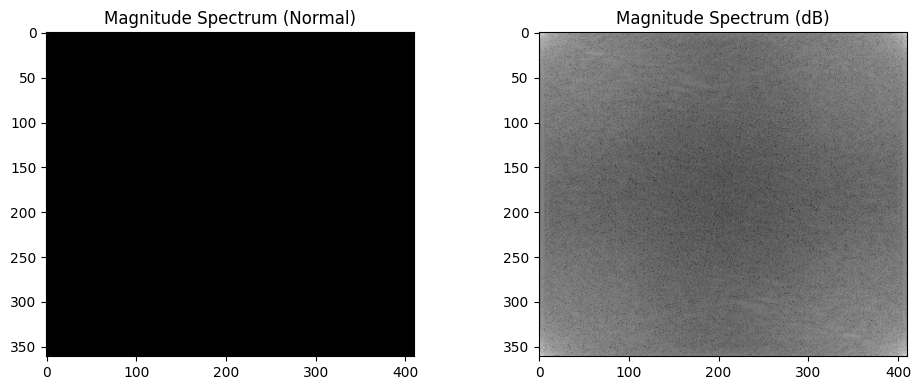

In [ ]:
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.imshow(mag_normal, cmap='gray')
plt.title('Magnitude Spectrum (Normal)')


plt.subplot(1, 2, 2)
plt.imshow(mag_dB, cmap='gray')
plt.title('Magnitude Spectrum (dB)')


plt.tight_layout()
plt.show()

### Where 2D fourier transform is centered?

When we calculate the 2D Fourier Transform, the zero-frequency component (DC component) will be in the top-left of the output spectrum. This implies the low-frequency components are centered in the corners, and the high-frequency components in the middle and edges.

To make the spectrum shift we use `np.fft.fftshift` 

After this shift:
- The low-frequency components are located at the center of the spectrum.

- The high-frequency components move to the edges and corners.

This middle position in the low frequencies allows for easier observation and inspection of the spectrum, especially of texture, edges, and noise.

In [6]:
f_shifted_dog = np.fft.fftshift(f_transform_dog)

Displaying the shifted magnitude spectras

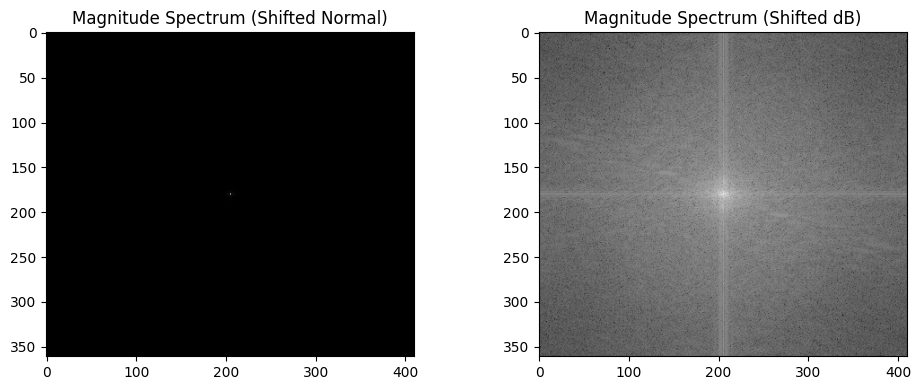

In [ ]:
mag_normal_shifted_dog = np.abs(f_shifted_dog)
mag_dB_shifted_dog = 20 * np.log10(mag_normal_shifted_dog + 1e-5)


plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.imshow(mag_normal_shifted_dog, cmap='gray')
plt.title('Magnitude Spectrum (Shifted Normal)')


plt.subplot(1, 2, 2)
plt.imshow(mag_dB_shifted_dog, cmap='gray')
plt.title('Magnitude Spectrum (Shifted dB)')


plt.tight_layout()
plt.show()

### Rotating the image anticlockwise 90-degrees

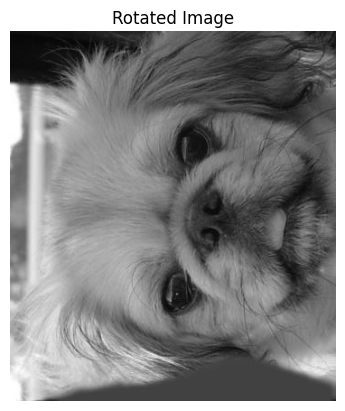

In [8]:
img_rotated_dog = np.rot90(img_dog)

plt.imshow(img_rotated_dog, cmap='gray')
plt.axis('off')  
plt.title('Rotated Image')
plt.show()


#### Finding the fourier transform of the rotated image and shifting the spectrum

In [9]:
f_transform_rotatedImg = np.fft.fft2(img_rotated_dog)
f_shifted_rotatedImg = np.fft.fftshift(f_transform_rotatedImg)


#### PLotting Magnitude Spectra of Rotated Image

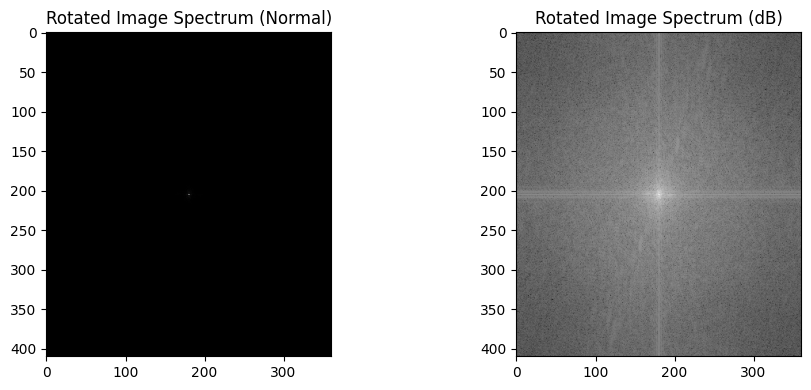

In [ ]:
# Magnitude spectrum
mag_normal_rotatedImg = np.abs(f_shifted_rotatedImg)
mag_dB_rotatedImg = 20 * np.log10(mag_normal_rotatedImg + 1e-5)

# Plotting
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.imshow(mag_normal_rotatedImg, cmap='gray')
plt.title('Rotated Image Spectrum (Normal)')


plt.subplot(1, 2, 2)
plt.imshow(mag_dB_rotatedImg, cmap='gray')
plt.title('Rotated Image Spectrum (dB)')


plt.tight_layout()
plt.show()

### Comparison of two Magnitude Spectras


Comparison with Original Spectrum:

- The rotated image spectrum is a 90-degree rotation of the original image spectrum.

- The content of the frequency (magnitude values) is identical.

- The orientation of the spectral components alone is modified.

#### Why is it so?
Rotation in the spatial domain (image) is equivalent to the same rotation in the frequency domain (spectrum).

The following plot compares the 2D Fourier Transform magnitude spectra (in dB scale) of:

- **Left:** Original image  
- **Right:** Rotated image (90° anti-clockwise)

This side-by-side view helps observe how rotation in the spatial domain affects the frequency domain.


In [ ]:
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.imshow(mag_dB_shifted_dog, cmap='gray')
plt.title('Magnitude Spectrum (Shifted dB)')
# plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(mag_dB_rotatedImg, cmap='gray')
plt.title('Rotated Image Spectrum (dB)')
# plt.axis('off')

plt.suptitle('Comparison Between Magnitude Spectra', fontsize=14, fontweight='bold')


plt.tight_layout()
plt.show()

## Hybrid Image


Hybrid Image is constructed by frequency mixing. It is a technique in image processing where two different images are combined in the frequency domain, so that each image contributes different frequency information.

- One image contains low frequency information.
- Other image contains high frequency information.

This creates a hybrid image where the visual system perceives one image when viewed from close up (high frequencies) and another when viewed from far away or with blurred vision (low frequencies).

**IMPORTANT NOTE**: In my project:
* **Cat Image** will be containing high frequency information.
* **Dog Image** will be containing low frequency information.

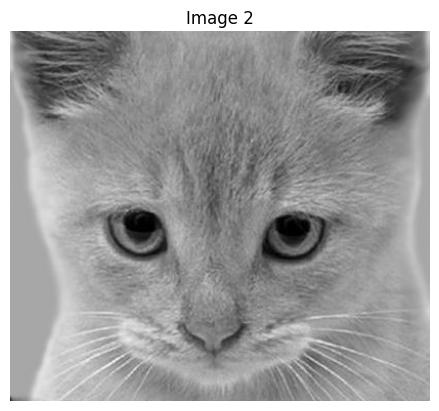

In [11]:
# importing cat image to cmbine it with dog image
img_cat = mpimg.imread('cat_gray.jpg')

plt.imshow(img_cat, cmap='gray')
plt.axis('off')  
plt.title('Image 2')
plt.show()

### Fourier transform of the cat image

In [12]:
f_transform_cat = np.fft.fft2(img_cat)
f_shifted_cat = np.fft.fftshift(f_transform_cat)

### Ideal Filters

An **Ideal filter** is used for separating low and high frequency components from the signal, it has sudden transition at a specified cutoff frequency $\omega_c$, unlike practical filter which has transition region like Gaussian filter:

#### Ideal low pass filter (ILPF)

$$
H(u, v) =
\begin{cases}
1, & \text{if } D(u, v) \leq D_0 \\\\
0, & \text{if } D(u, v) > D_0
\end{cases}
$$


#### Ideal High-Pass Filter (IHPF)

$$
H(u, v) =
\begin{cases}
0, & \text{if } D(u, v) \leq D_0 \\\\
1, & \text{if } D(u, v) > D_0
\end{cases}
$$
**Where:**

- \( H(u, v) \): transfer function 
- Distance from the center of the frequency domain: 
$$
D(u, v) = \sqrt{ \left(u - \frac{M}{2} \right)^2 + \left(v - \frac{N}{2} \right)^2 }
$$ 
- $D_0$ or $\omega_c$: cutoff frequency  
- M and N are the dimensions of the image or frequency grid  

#### Characteristics of ILPF and IHPF 
- The **Ideal Low-Pass Filter** allows low-frequency components (smooth variations) to pass and blocks high-frequency details (edges, noise).
- The **Ideal High-Pass Filter** allows only high-frequency components to pass, enhancing edges and fine details by removing the smooth parts.
- The sharp in Ideal filters transition causes Gibbs phenomena


**NOTE:** We use practical filters like Gaussian filter in most cases, but in this project I will be making hybrid image by help of Ideal filters

In [13]:

def ideal_filter_freq(shape, cutoff, filter_type='low'):

    rows, cols = shape
    y, x = np.ogrid[:rows, :cols]
    cx, cy = cols // 2, rows // 2
    distance = np.sqrt((x - cx)**2 + (y - cy)**2)

    if filter_type == 'low':
        mask = distance <= cutoff
    elif filter_type == 'high':
        mask = distance > cutoff
    return mask.astype(float)


### Display of Ideal filter: low pass and high pass

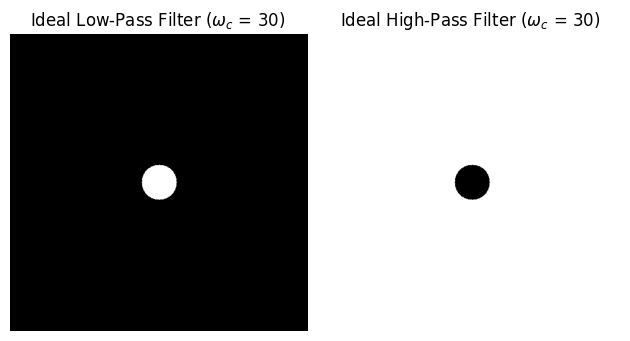

In [17]:

low_pass = ideal_filter_freq((512, 512), cutoff=30, filter_type='low')
high_pass = ideal_filter_freq((512, 512), cutoff=30, filter_type='high')

# Display them
plt.subplot(1, 2, 1)
plt.imshow(low_pass, cmap='gray')
plt.title(r"Ideal Low-Pass Filter ($\omega_c$ = 30) ")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(high_pass, cmap='gray')
plt.title(r"Ideal High-Pass Filter ($\omega_c$ = 30) ")
plt.axis('off')

plt.tight_layout()
plt.show()


### Creating Ideal Filters for Dog and Cat images

In [18]:
cutoff_low = 30
cutoff_high = 10

# Create Ideal Low-pass and High-pass filters
G_low = ideal_filter_freq(f_shifted_dog.shape, cutoff_low, filter_type='low')
G_high = ideal_filter_freq(f_shifted_cat.shape, cutoff_high, filter_type='high')

### Applying Filters in Frequency domain

In [19]:
F_low = f_shifted_dog * G_low
F_high = f_shifted_cat * G_high

### Making Hybird in frequency domain and plotting its magnitude spectrum

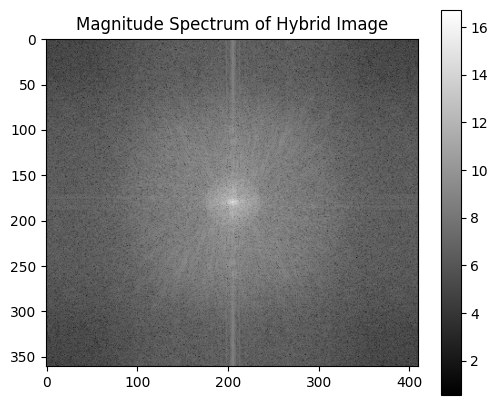

In [20]:
F_hybrid = F_low + F_high

# Plotting magnitude spectrum of hybrid
magnitude_spectrum = np.log(1 + np.abs(F_hybrid))

plt.figure(figsize=(6, 5))
img_plot = plt.imshow(magnitude_spectrum, cmap='gray')  
plt.title("Magnitude Spectrum of Hybrid Image")
plt.colorbar(img_plot)  
plt.show()

### Inverse Fourier Transform of the Hybrid to spatial domain

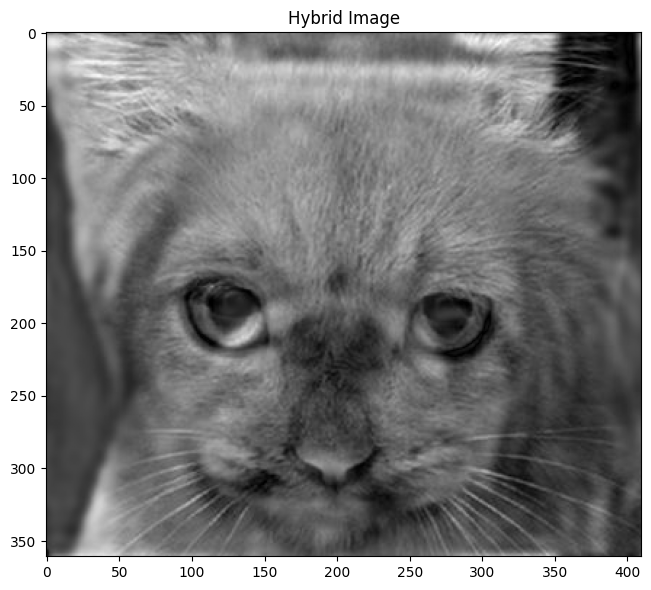

In [21]:
hybrid = np.fft.ifft2(np.fft.ifftshift(F_hybrid))
hybrid = np.abs(hybrid)
hybrid = (hybrid - hybrid.min()) / (hybrid.max() - hybrid.min())
hybrid = (hybrid * 255).astype(np.uint8)

#Plotting the hybrid image
plt.figure(figsize=(16, 6))

plt.imshow(hybrid, cmap='gray')
plt.title("Hybrid Image")

plt.tight_layout()
plt.show()

# Conclusion:

We explored the power of 2D Discrete Fourier Transform (2D-DFT) in image processing by analyzing, manipulating, and combining images in the frequency domain. We began by computing and visualizing the magnitude spectra of an image and its 90-degree rotated version, demonstrating that rotation in the spatial domain results in an equivalent rotation in the frequency domain, with the underlying frequency content preserved. By applying the Fourier shift, we made the low-frequency components more accessible for analysis.

We then introduced the concept of hybrid images, combining the low-frequency information from one image (cat) with the high-frequency information from another (dog) using ideal low-pass and high-pass filters. This process illustrated how frequency domain filtering enables selective enhancement or suppression of image features, such as edges and smooth regions. The final hybrid image, reconstructed via the inverse Fourier transform, visually demonstrated how different frequency components from two sources can be seamlessly merged to create a new perceptual effect.